# <center> Cajamar UniversityHack 2023 

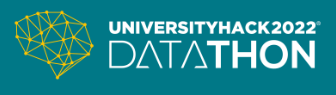

## Equipo: Malbecs
## Fase: I
## Centro: Universidad Complutense de Madrid
### Miembros: Trosman Denis, Stammati Vito, Kumar Sumit.

## <center> Reto Wine Prediction - EDA

## Importación de librerias

In [ ]:
#EDA
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  

import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Lectura de datos

In [ ]:
df = pd.read_csv()

Visualización del dataset

In [ ]:
df.head()

Caracteristicas principales

In [ ]:
print(f'Número de filas: {df.shape[0]}, Número de columnas:{df.shape[1]}')
print(f'\nCantidad de duplicados: {df.duplicated().sum()}\n')
print('-------- Tipos de columnas --------')
print(df.dtypes)
print('\n -------- Cantidad de nulos --------')
df.isna().sum()

Vemos distribuciones y si hay valores mayoritarios

In [ ]:
def valores_unicos(df,columna):
    data_frame = pd.DataFrame(df[columna].value_counts())
    data_frame['share']=data_frame[columna]/sum(data_frame[columna])*100 
    return data_frame

#Funcion para mostrar DataFrames lado por lado
#fuente: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [ ]:
for col in df.columns:
    display_side_by_side(valores_unicos(df,col).head(),
                         titles = [col])

Unique values

In [ ]:
df.nunique(axis=0)

Distribuciones y descripción general

In [ ]:
#Númericas
df.describe()

In [ ]:
#Resto
df.describe(include='O')

Correlaciones

In [ ]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(12,12))
    ax.set_facecolor('white')
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)

    plt.show()

In [ ]:
num_cols =  df.select_dtypes([np.number]).columns

df_num = df[num_cols]

cor_mat = round(df_num.corr(),2)

Generate_heatmap_graph(cor_mat
                       ,chart_title = 'Correlaciones'
                       ,mask_uppertri = True)

## Visualizacion

In [ ]:
label = []

px.line(data = df, x=COLUMNA DE FECHA, y=label, color='.....',title = "....." )

In [ ]:
sns.pairplot(df)

Histogramas

In [ ]:
for col in num_cols:
    sns.histplot(data=df,x=col)
    plt.show()